In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from thewalrus.quantum import photon_number_cumulant


# Correlation

In [9]:
dir = "<replace/with/your/own/file/directory>"
cov = np.load(dir + "cov.npy")
sq_cov = np.load(dir + "sq_cov.npy")
M = len(cov) // 2 

first_order = np.zeros(M)  # ideal first_order
for i in range(M):
    modes = [i, i + M] 
    sub_cov = cov[np.ix_(modes, modes)] 
    first_order[i] = np.trace(sub_cov - np.eye(2)) / 4 
    
second_order = []  # ideal second_order
for i in range(M):
    for j in range(i + 1, M):
        second_order.append(photon_number_cumulant(np.zeros(len(cov)), cov, [i, j]))    

d = 4
chi = 600 
samples_MPS = np.load("<replace_with_your_MPS_samples.npy>") 
samples_exp = np.load("<replace_with_experimental_samples.npy>") 

first_order_MPS = np.average(samples_MPS, axis = 0)
first_order_exp = np.average(samples_exp, axis = 0)

In [52]:
second_order_exp = [] 
second_order_MPS = [] 
for i in tqdm(range(M)):
    for j in range(i + 1, M):
        second_order_exp.append(np.average(np.product(samples_exp[:, [i, j]], axis = 1)) - first_order_exp[i] * first_order_exp[j]) 
        second_order_MPS.append(np.average(np.product(samples_MPS[:, [i, j]], axis = 1)) - first_order_MPS[i] * first_order_MPS[j])    

100%|█████████████████████████████████████████| 216/216 [01:01<00:00,  3.50it/s]


In [ ]:
# Pearson correlation of 1st order
print(np.corrcoef(first_order, first_order_exp)[0, 1], np.corrcoef(first_order, first_order_MPS)[0, 1])
# Pearson correlation of 2nd order
print(np.corrcoef(second_order, second_order_exp)[0, 1], np.corrcoef(second_order, second_order_MPS)[0, 1])
# two-norm
print(np.linalg.norm(second_order - second_order_exp), np.linalg.norm(second_order - second_order_MPS))

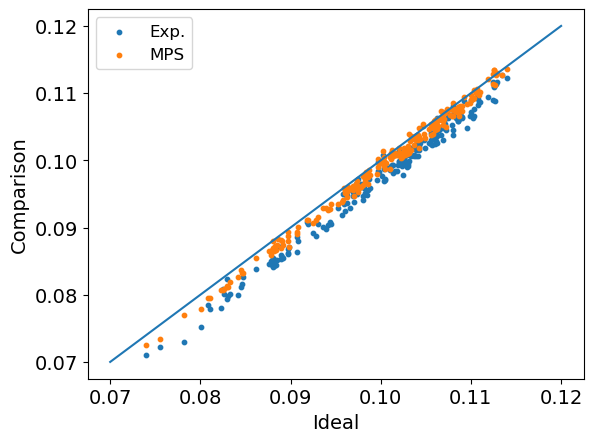

In [35]:
# first order comparison
plt.scatter(first_order, first_order_exp, label = "Exp.", s = 10)
plt.scatter(first_order, first_order_MPS, label = "MPS", s = 10)
plt.plot(np.linspace(0.07, 0.12, 10), np.linspace(0.07, 0.12, 10))
plt.xlabel("Ideal", fontsize = 14)
plt.ylabel("Comparison", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 12)

In [29]:
x1, y1 = np.polyfit(second_order, second_order_exp, 1)
x2, y2 = np.polyfit(second_order, second_order_MPS, 1)
# slope
print(x1, x2)

(0.9191365606061233, 0.9350956824899456)

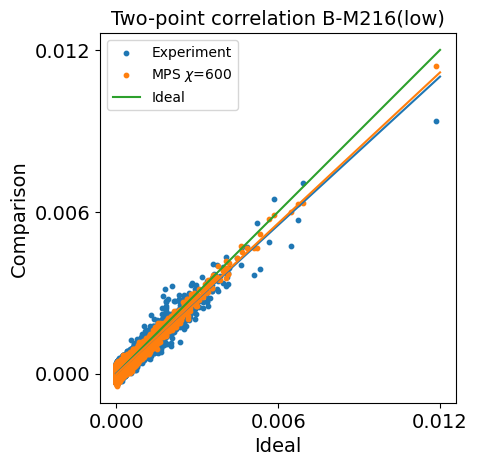

In [61]:
# Plot 2nd order
t = np.linspace(0, 0.012, 10);
plt.scatter(second_order, second_order_exp, label = "Experiment", s = 10)
plt.scatter(second_order, second_order_MPS, label = f"MPS $\chi$={chi}", s = 10)
plt.plot(t, t, color = 'C2', label = "Ideal")
plt.plot(t, x1 * t + y1, color = 'C0')
plt.plot(t, x2 * t + y2, color = 'C1')
plt.title("Two-point correlation B-M216(low)", fontsize = 14)
plt.xlabel("Ideal", fontsize = 14)
plt.ylabel("Comparison", fontsize = 14)
plt.xticks(np.linspace(0, 0.012, 3), fontsize = 14)
plt.yticks(np.linspace(0, 0.012, 3), fontsize = 14)
plt.legend(fontsize = 12)
plt.gca().set_aspect('equal')